In [12]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spec_data = pd.read_csv('species_info.csv')
obs_data = pd.read_csv('observations.csv')

obs_data.info()
obs_data.describe()
obs_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [18]:

spec_data.info()
spec_data.describe()


spec_null = 5824 - 191
print("There are {} values missing for the column \'conservation_status\'".format(spec_null))


spec_categories = spec_data['category'].unique()
print(spec_categories)
spec_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
There are 5633 values missing for the column 'conservation_status'
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


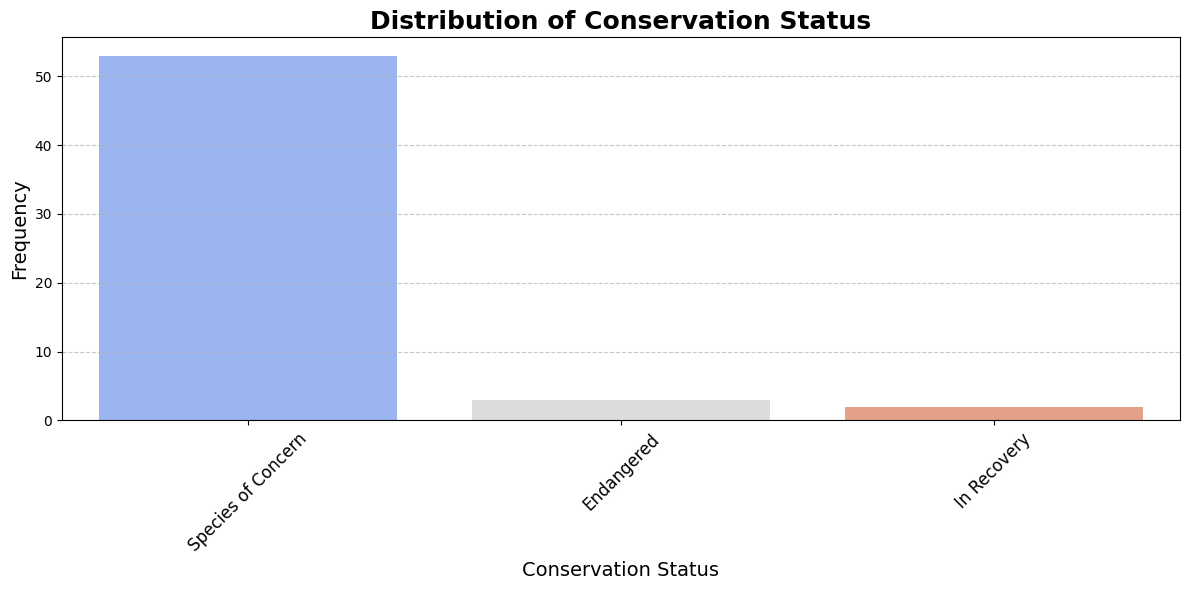

In [17]:
#Distribution of conservation_status
subset_spec = spec_data.sample(frac=0.3, random_state=42)

plt.figure(figsize=(12, 6))
sns.countplot(
    x='conservation_status',
    data=subset_spec,
    order=subset_spec['conservation_status'].value_counts().index, hue='conservation_status',
    palette="coolwarm", legend=False)
plt.title('Distribution of Conservation Status', fontsize=18, weight='bold')
plt.xlabel('Conservation Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()



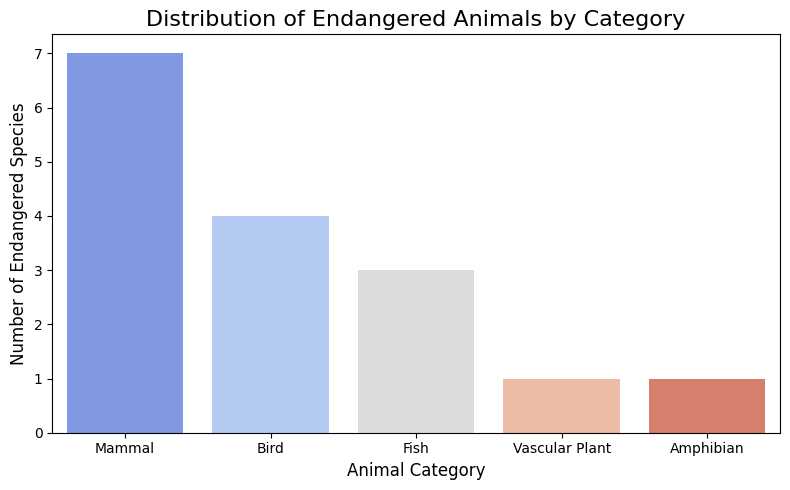

In [21]:
#Endangered
endangered_data = spec_data[spec_data['conservation_status'] == 'Endangered']

category_counts = endangered_data['category'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette="coolwarm", legend=False)
plt.title('Distribution of Endangered Animals by Category', fontsize=16)
plt.xlabel('Animal Category', fontsize=12)
plt.ylabel('Number of Endangered Species', fontsize=12)

plt.tight_layout()
plt.show()

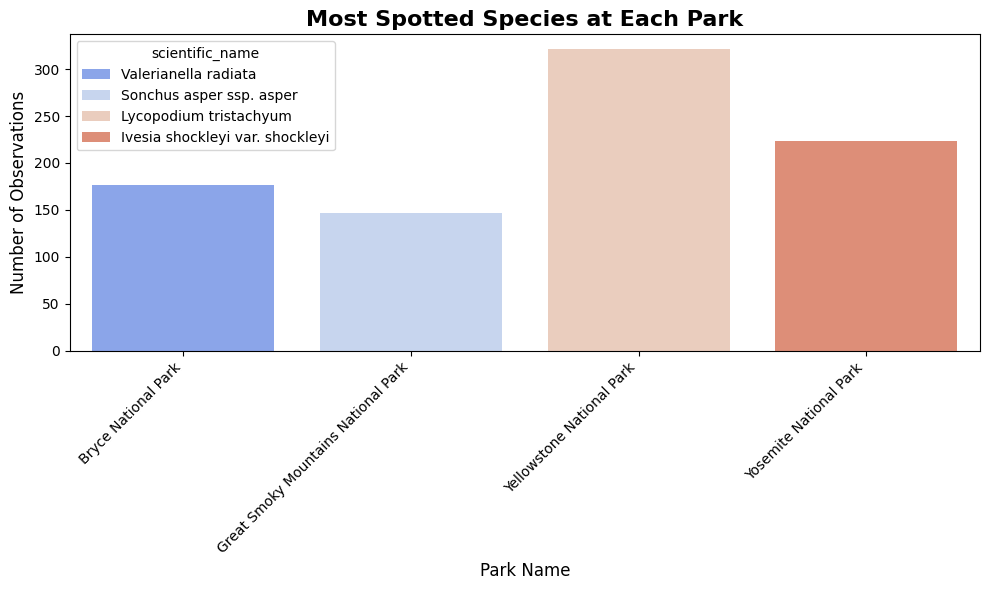

In [24]:
#Species spotted most at each park
most_spotted_species = obs_data.loc[obs_data.groupby('park_name')['observations'].idxmax()]
plt.figure(figsize=(10, 6))
sns.barplot(
    x="park_name", 
    y="observations", 
    hue="scientific_name", 
    data=most_spotted_species, 
    palette="coolwarm"
)
plt.title('Most Spotted Species at Each Park', fontsize=16, weight='bold')
plt.xlabel('Park Name', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [ ]:
#See powerpoint for overview.